# Classificadores

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import math

### Questão 1

<b> Regressão Logística – Gradiente Descendente </b>

In [2]:
class LogisticRegressionGD:
    def __init__(self, epochs=1000, alpha=0.001):
        self.epochs = epochs
        self.alpha = alpha
        
    def fit(self, x, y):
        n = x.shape[0]
        x_ = np.c_[np.ones(n), x]
        
        self.b = np.zeros(x_.shape[1])
        
        for _ in range(self.epochs):
            y_pred = self.predict(x)

            erro = y - y_pred
            grad = np.dot(erro, x_) / float(len(x_))
            
            self.b += self.alpha * grad
            
    def predict(self, x):
        
        n = x.shape[0]
        x_ = np.c_[np.ones(n), x]
        
        y_pred = list(1./(1 + np.exp(-(np.dot(x_,self.b)))))
        
        y_pred = [(1. if y >= 0.5 else 0.) for y in y_pred]
        
        return np.array(y_pred)

<b> Naive Bayes Gaussiano </b>

In [3]:
class GaussianNB:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        n = len(y)
        self.classes = []
        self.probab_classe = {}
        self.mean_classe = {}
        self.matriz_classe = {}
        
        #pegar as classes únicas
        classes_u = np.unique(y)
        
        for classe in classes_u:
            #adicionar a classe na lista de classes
            self.classes.append(classe)
            
            i_c = np.where(y == classe)[0]
            n_c = len(i_c)
            self.probab_classe[classe] = n_c/n
            
            self.mean_classe[classe] = np.mean(X[i_c], axis=0)
            
            #Matriz de covariância
            matriz_covariancia = np.cov(X[i_c].T)
            valores_diag = list(matriz_covariancia.diagonal())
            
            #Preencher a diagonal principal da matriz
            nova_matriz = np.zeros(matriz_covariancia.shape)
            np.fill_diagonal(nova_matriz, valores_diag)
            
            self.matriz_classe[classe] = nova_matriz 
        
    def predict(self, X):
        y_pred = []
        
        #pegar a quantidade de colunas do conjunto de instâncias
        n = X.shape[1]
        
        for instancia in X:
            probab = 0
            classe_x = None
            
            for classe in self.classes:
                prob_x_c = np.linalg.det(self.matriz_classe[classe])
                prob_x_c = np.sqrt(prob_x_c) * ((2*math.pi)**(n/2))
                prob_x_c = 1/prob_x_c
                
                prob_x_c_ = np.dot((instancia - self.mean_classe[classe]).T, np.linalg.inv(self.matriz_classe[classe]))
                prob_x_c_ = (-1/2) * np.dot(prob_x_c_, (instancia - self.mean_classe[classe]))
                prob_x_c_ = math.exp(prob_x_c_)
                
                probab_x_c = prob_x_c * prob_x_c_
                probab_x_c = probab_x_c * self.probab_classe[classe]
                
                if probab_x_c > probab:
                    probab = probab_x_c
                    classe_x = classe
        
            y_pred.append(classe_x)
        return np.array(y_pred)
                

<b> Discriminante Quadrático Gaussiano </b>

In [4]:
class GaussianDQ:
    def __init__(self):
        pass
    def fit(self, X, y):
        n = len(y)
        self.classes = []
        self.probab_classe = {}
        self.mean_classe = {}
        self.matriz_classe = {}
        
        #pegar as classes únicas
        classes_u = np.unique(y)
        
        for classe in classes_u:
            #adicionar a classe na lista de classes
            self.classes.append(classe)
            
            i_c = np.where(y == classe)[0]
            n_c = len(i_c)
            self.probab_classe[classe] = n_c/n
            
            self.mean_classe[classe] = np.mean(X[i_c], axis=0)
            
            #Matriz de covariância
            self.matriz_classe[classe] = np.cov(X[i_c].T)
        
    def predict(self, X):
        y_pred = []

        #pegar a quantidade de colunas do conjunto de instâncias
        n = X.shape[1]

        for instancia in X:
            probab = 0
            classe_x = None

            for classe in self.classes:
                prob_x_c = np.linalg.det(self.matriz_classe[classe])
                prob_x_c = np.sqrt(prob_x_c) * ((2*math.pi)**(n/2))
                prob_x_c = 1/prob_x_c

                prob_x_c_ = np.dot((instancia-self.mean_classe[classe]).T, np.linalg.inv(self.matriz_classe[classe]))
                prob_x_c_ = (-1/2) * np.dot(prob_x_c_, (instancia - self.mean_classe[classe]))
                prob_x_c_ = math.exp(prob_x_c_)

                probab_x_c = prob_x_c * prob_x_c_
                probab_x_c = probab_x_c * self.probab_classe[classe]

                if probab_x_c > probab:
                    probab = probab_x_c
                    classe_x = classe

            y_pred.append(classe_x)
        return np.array(y_pred)

### Questão 2
Implemente a função acurácia(y_true, y_pred) que retorna a porcentagem de acerto de y_true.

In [5]:
def acuracia(y_true, y_pred):
    acc = 0
    for i in range(len(y_pred)):
        if y_pred[i] == y_true[i]:
            acc += 1
    return acc/len(y_pred)

### Questão 3
Implemente uma função que receba um classificador e o conjunto de testes e exiba uma matriz de confusão.

In [6]:
def plot_confusion_matrix_(X, y, clf):
    y_pred = clf.predict(X)
    
    cm = confusion_matrix(y, y_pred)
    
    index = ["0.", "1."]
    columns = ["0.", "1."]
    
    cm_df = pd.DataFrame(cm, columns, index)
    
    plt.figure(figsize=(6,6))
    sns.heatmap(cm_df, annot=True, cmap=plt.cm.Reds)

### Questão 4
Implemente uma função que receba o classificador e o conjunto de teste e exiba o conjunto de testes em um gráfico de dispersão juntamente com as fronteiras de separação do classificador.

In [7]:
def plot_boundaries(X, y, clf):
    
    # Traçar a fronteira de decisão. Para isso, atribuiremos uma cor a cada
    # ponto na malha [x_min, x_max] x [y_min, y_max].
    x_min = X[:, 0].min() - .5
    x_max = X[:, 0].max() + .5
    y_min = X[:, 1].min() - .5
    y_max = X[:, 1].max() + .5

    #Tamanho da etapa na malha
    h = .02

    #Retornando matrizes de coordenadas a partir de vetores de coordenadas.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    #Valores preditos
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    #Colocando o resultado em um gráfico de cores
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(5, 5))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Spectral)

    #Plotando os pontos
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Spectral)
    plt.xlabel('Featuring 1')
    plt.ylabel('Featuring 2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

### Carregar o conjunto de dados

In [8]:
dados = np.loadtxt('ex2data1.txt', delimiter=',')
dados[:3]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ]])

### Separando as características e a variável alvo

In [9]:
x = dados[:, :-1]
y = dados[:, -1]

In [10]:
np.unique(y)

array([0., 1.])

### Normalizando os dados

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x[:3]

array([[0.06542784, 0.69465488],
       [0.00326632, 0.19470455],
       [0.08296784, 0.61961779]])

### Dividir o dataset
Usar 70% do conjunto para treino e 30% para teste

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

### Para cada uma das técnicas de classificação apresente:

<b> a. A porcentagem de predições corretas para o conjunto de teste usando a função acurácia. </b>

In [13]:
# Regressão Logística - Gradiente Descendente
rl = LogisticRegressionGD()
rl.fit(x_train, y_train)
y_pred_rl = rl.predict(x_test)

acc_rl = acuracia(y_test, y_pred_rl) * 100
print("Predições corretas (Regressão Logística - GD) para o conj. de treino: {:.2f}%".format(acc_rl))

Predições corretas (Regressão Logística - GD) para o conj. de treino: 90.00%


In [14]:
# Naive Bayes Gaussiano
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

acc_nb = acuracia(y_test, y_pred_nb) * 100
print("Predições corretas (Naive Bayes Gaussiano) para o conj. de treino: {:.2f}%".format(acc_nb))

Predições corretas (Naive Bayes Gaussiano) para o conj. de treino: 96.67%


In [15]:
# Discriminante Quadrático Gaussiano
dq = GaussianDQ()
dq.fit(x_train, y_train)
y_pred_dq = dq.predict(x_test)


acc_dq = acuracia(y_test, y_pred_dq) * 100
print("Predições corretas (Discriminante Quadrático Gaussiano) para o conj. de treino: {:.2f}%".format(acc_dq))

Predições corretas (Discriminante Quadrático Gaussiano) para o conj. de treino: 93.33%


<b> b. A matriz de confusão </b>

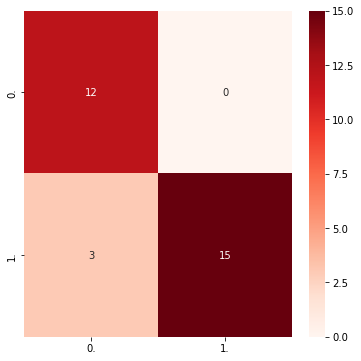

In [16]:
# Regressão Logística - Gradiente Descendente
plot_confusion_matrix_(x_test, y_test, rl)

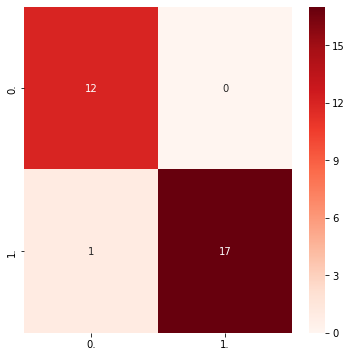

In [17]:
# Naive Bayes Gaussiano
plot_confusion_matrix_(x_test, y_test, nb)

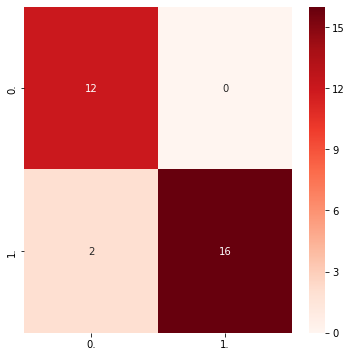

In [18]:
# Discriminante Quadrático Gaussiano
plot_confusion_matrix_(x_test, y_test, dq)

<b> c. O dado em um gráfico de dispersão com as fronteiras de separação. </b>

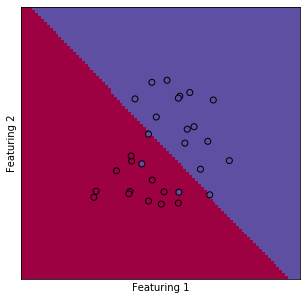

In [19]:
# Regressão Logística - Gradiente Descendente
rl.fit(x_train, y_train)
plot_boundaries(x_test, y_test, rl)

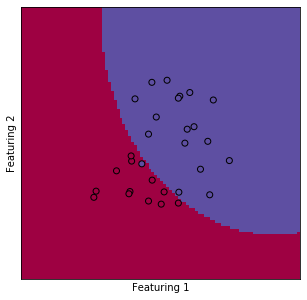

In [20]:
# Naive Bayes Gaussiano
nb.fit(x_train, y_train)
plot_boundaries(x_test, y_test, nb)

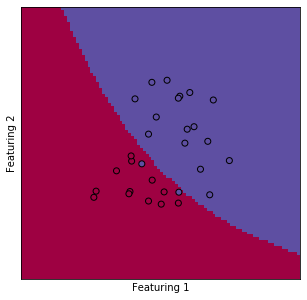

In [21]:
# Discriminante Quadrático Gaussiano
dq.fit(x_train, y_train)
plot_boundaries(x_test, y_test, dq)

### O dado parece ser linearmente separável ou não?

O dado não é linearmente separável. É possível observar isso no seguinte gráfico.

Não é possível traçar uma linha que separe as classes presentes nos dados.

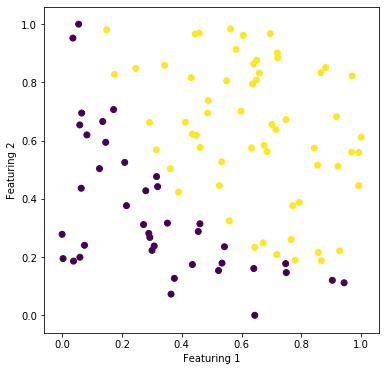

In [26]:
plt.figure(1, figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('Featuring 1')
plt.ylabel('Featuring 2');

### Quais dos métodos produziu fronteiras lineares?

O método da Regressão Linear Logistica - Gradiente Descendente foi o único que produziu fronteiras lineares, como mostrado em um gráfico de dispersão na questão anterior.

### Qual teve melhor acurácia?

O método que obteve melhor acurácia foi o Naive Bayes Gayssiano com 96.67%. A acurácia diz quanto o modelo acertou das previsões possíveis. Pela matriz de confusão, já mostrada na questão anterior, é possível perceber que o modelo errou apenas uma previsão.

In [23]:
#Fim